In [1]:
from tensorflow.keras.datasets import boston_housing
(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data()

57344/57026 [==============================] - 0s 0us/step


In [2]:
mean = train_data.mean(axis=0)
train_data -= mean
std = train_data.std(axis=0)
train_data /= std

test_data -= mean
test_data /= std

In [4]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import tensorflow as tf

with tf.device("/cpu:0"):

    def build_model():
        model = Sequential()
        model.add(Dense(64, activation="relu", input_shape=(train_data.shape[1], )))
        model.add(Dense(64, activation="relu"))
        model.add(Dense(1))
        model.compile(optimizer="rmsprop", loss="mae", metrics=["mse"])
        return model

In [7]:
import numpy as np

with tf.device("/cpu:0"):    
    k = 4
    num_val_samples = len(train_data) // k
    num_epochs = 100
    all_scores = []

    for i in range(k):
        print("processing fold #", i)
        val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
        val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]

        partial_train_data = np.concatenate([train_data[:i * num_val_samples], train_data[(i + 1) * num_val_samples:]], axis=0)
        partial_train_targets = np.concatenate([train_targets[:i * num_val_samples], train_targets[(i + 1) * num_val_samples:]], axis=0)

        model = build_model()
        model.fit(partial_train_data, partial_train_targets, epochs=num_epochs, batch_size=1)
        
        val_mse, val_mae = model.evaluate(val_data, val_targets)
        all_scores.append(val_mae)
        

processing fold # 0
Epoch 1/100
303/303 [==============================] - 1s 679us/step - loss: 349.7792 - mse: 349.7792
Epoch 2/100
303/303 [==============================] - 0s 658us/step - loss: 30.2537 - mse: 30.2537
Epoch 3/100
303/303 [==============================] - 0s 661us/step - loss: 21.0082 - mse: 21.0082
Epoch 4/100
303/303 [==============================] - 0s 632us/step - loss: 10.9673 - mse: 10.9673
Epoch 5/100
303/303 [==============================] - 0s 655us/step - loss: 18.6124 - mse: 18.6124
Epoch 6/100
303/303 [==============================] - 0s 635us/step - loss: 10.8715 - mse: 10.8715
Epoch 7/100
303/303 [==============================] - 0s 634us/step - loss: 14.7043 - mse: 14.7043
Epoch 8/100
303/303 [==============================] - 0s 645us/step - loss: 15.0486 - mse: 15.0486
Epoch 9/100
303/303 [==============================] - 0s 645us/step - loss: 10.1585 - mse: 10.1585
Epoch 10/100
303/303 [==============================] - 0s 632us/step - loss: 

303/303 [==============================] - 0s 771us/step - loss: 5.3314 - mse: 5.3314
Epoch 84/100
303/303 [==============================] - 0s 837us/step - loss: 4.0225 - mse: 4.0225
Epoch 85/100
303/303 [==============================] - 0s 715us/step - loss: 5.6659 - mse: 5.6659
Epoch 86/100
303/303 [==============================] - 0s 606us/step - loss: 4.1601 - mse: 4.1601
Epoch 87/100
303/303 [==============================] - 0s 609us/step - loss: 4.5230 - mse: 4.5230
Epoch 88/100
303/303 [==============================] - 0s 630us/step - loss: 4.8709 - mse: 4.8709
Epoch 89/100
303/303 [==============================] - 0s 625us/step - loss: 5.6573 - mse: 5.6573
Epoch 90/100
303/303 [==============================] - 0s 635us/step - loss: 3.7442 - mse: 3.7442
Epoch 91/100
303/303 [==============================] - 0s 657us/step - loss: 4.9601 - mse: 4.9601
Epoch 92/100
303/303 [==============================] - 0s 758us/step - loss: 4.4752 - mse: 4.4752
Epoch 93/100
303/303 [=

303/303 [==============================] - 0s 629us/step - loss: 8.1161 - mse: 8.1161
Epoch 65/100
303/303 [==============================] - 0s 619us/step - loss: 5.0109 - mse: 5.0109
Epoch 66/100
303/303 [==============================] - 0s 625us/step - loss: 4.9456 - mse: 4.9456
Epoch 67/100
303/303 [==============================] - 0s 747us/step - loss: 7.1243 - mse: 7.1243
Epoch 68/100
303/303 [==============================] - 0s 602us/step - loss: 4.7999 - mse: 4.7999
Epoch 69/100
303/303 [==============================] - 0s 635us/step - loss: 4.1277 - mse: 4.1277
Epoch 70/100
303/303 [==============================] - 0s 745us/step - loss: 4.1024 - mse: 4.1024
Epoch 71/100
303/303 [==============================] - 0s 611us/step - loss: 5.4659 - mse: 5.4659
Epoch 72/100
303/303 [==============================] - 0s 625us/step - loss: 5.3394 - mse: 5.3394
Epoch 73/100
303/303 [==============================] - 0s 692us/step - loss: 4.9333 - mse: 4.9333
Epoch 74/100
303/303 [=

303/303 [==============================] - 0s 644us/step - loss: 4.4250 - mse: 4.4250
Epoch 46/100
303/303 [==============================] - 0s 632us/step - loss: 4.7927 - mse: 4.7927
Epoch 47/100
303/303 [==============================] - 0s 639us/step - loss: 4.3673 - mse: 4.3673
Epoch 48/100
303/303 [==============================] - 0s 625us/step - loss: 3.7766 - mse: 3.7766
Epoch 49/100
303/303 [==============================] - 0s 625us/step - loss: 4.8149 - mse: 4.8149
Epoch 50/100
303/303 [==============================] - 0s 629us/step - loss: 5.5421 - mse: 5.5421
Epoch 51/100
303/303 [==============================] - 0s 628us/step - loss: 4.3852 - mse: 4.3852
Epoch 52/100
303/303 [==============================] - 0s 635us/step - loss: 5.1396 - mse: 5.1396
Epoch 53/100
303/303 [==============================] - 0s 621us/step - loss: 4.5690 - mse: 4.5690
Epoch 54/100
303/303 [==============================] - 0s 622us/step - loss: 4.3537 - mse: 4.3537
Epoch 55/100
303/303 [=

303/303 [==============================] - 0s 671us/step - loss: 7.3554 - mse: 7.3554
Epoch 27/100
303/303 [==============================] - 0s 655us/step - loss: 8.1753 - mse: 8.1753
Epoch 28/100
303/303 [==============================] - 0s 665us/step - loss: 6.4205 - mse: 6.4205
Epoch 29/100
303/303 [==============================] - 0s 642us/step - loss: 6.2078 - mse: 6.2078
Epoch 30/100
303/303 [==============================] - 0s 649us/step - loss: 7.0569 - mse: 7.0569
Epoch 31/100
303/303 [==============================] - 0s 672us/step - loss: 5.4259 - mse: 5.4259
Epoch 32/100
303/303 [==============================] - 0s 671us/step - loss: 5.9957 - mse: 5.9957
Epoch 33/100
303/303 [==============================] - 0s 629us/step - loss: 5.6191 - mse: 5.6191
Epoch 34/100
303/303 [==============================] - 0s 662us/step - loss: 5.8891 - mse: 5.8891
Epoch 35/100
303/303 [==============================] - 0s 645us/step - loss: 5.6537 - mse: 5.6537
Epoch 36/100
303/303 [=

In [8]:
all_scores

[8.127944946289062, 14.006911277770996, 18.065265655517578, 15.1426420211792]

In [9]:
k = 4
num_val_samples = len(train_data) // k
num_val_samples

101

In [22]:
with tf.device("/cpu:0"):
    num_epochs = 500
    all_mae_histories = []
    for i in range(k):
        print("processing fold #", i)
        val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
        val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]

        partial_train_data = np.concatenate([train_data[:i * num_val_samples], train_data[(i + 1) * num_val_samples:]], axis=0)
        partial_train_targets = np.concatenate([train_targets[:i * num_val_samples], train_targets[(i + 1) * num_val_samples:]], axis=0)

        model = build_model()
        history = model.fit(partial_train_data, partial_train_targets,validation_data=(val_data, val_targets), epochs=num_epochs, batch_size=1, verbose=0)
        mae_history = history.history["val_mse"]
        all_mae_histories.append(mae_history)

processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3


In [23]:
average_mean_history = [np.mean( [x[i] for x in all_mae_histories]) for i in range((num_epochs))]

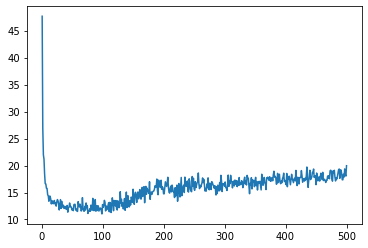

In [29]:
import matplotlib.pyplot as plt
plt.plot(range(1, len(average_mean_history)+1), average_mean_history)
plt.show()

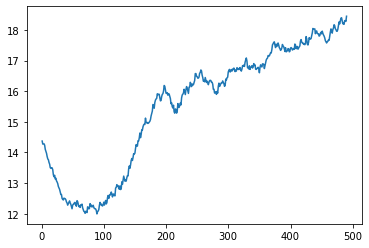

In [32]:
def smooth_curve(points, factor=0.9):
    smoothed_points = []
    for point in points:
        if smoothed_points:
            previous = smoothed_points[-1]
            smoothed_points.append(previous * factor + point * (1-factor))
        else:
            smoothed_points.append(point)
    return smoothed_points
smooth_mae_history = smooth_curve(average_mean_history[10:])
plt.plot(range(1, len(smooth_mae_history) + 1), smooth_mae_history)
plt.show()

In [34]:
with tf.device("/cpu:0"):
    model = build_model()
    model.fit(train_data, train_targets, epochs=80, batch_size=16)
    test_mse_score, test_mae_score = model.evaluate(test_data, test_targets)
    print(test_mae_score)

Epoch 1/80
26/26 [==============================] - 1s 879us/step - loss: 593.4808 - mse: 593.4808
Epoch 2/80
26/26 [==============================] - 0s 879us/step - loss: 390.9275 - mse: 390.9275
Epoch 3/80
26/26 [==============================] - 0s 799us/step - loss: 213.3403 - mse: 213.3403
Epoch 4/80
26/26 [==============================] - 0s 800us/step - loss: 106.0339 - mse: 106.0339
Epoch 5/80
26/26 [==============================] - 0s 999us/step - loss: 47.8121 - mse: 47.8121
Epoch 6/80
26/26 [==============================] - 0s 879us/step - loss: 36.7366 - mse: 36.7366
Epoch 7/80
26/26 [==============================] - 0s 1ms/step - loss: 25.9903 - mse: 25.9903
Epoch 8/80
26/26 [==============================] - 0s 879us/step - loss: 20.8490 - mse: 20.8490
Epoch 9/80
26/26 [==============================] - 0s 999us/step - loss: 23.1537 - mse: 23.1537
Epoch 10/80
26/26 [==============================] - 0s 959us/step - loss: 22.1940 - mse: 22.1940
Epoch 11/80
26/26 [====

In [37]:
from sklearn.linear_model import LinearRegression
from sklearn.mean_absolute_error
lin_reg = LinearRegression()
lin_reg.fit(train_data, train_targets)
predicts = lin_reg.score(test_data, test_targets)

0.7213535934621551